# Autoencoder
* https://medium.com/ai-academy-taiwan/what-are-autoencoders-175b474d74d1
* https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/
* https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/9-Autoencoder_example.py

In [1]:
middle_dim = 100
encoding_dim = 50

SAVE_NAME = str(middle_dim) + '-' + str(encoding_dim) + 'dim'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

In [2]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [4]:
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Load data

In [5]:
df = pd.read_csv('./input/followingMatrix_over1.csv')
df

,movie,20thcenturyfox,a24,accessonline,adamsandler,adamshankman,agt,aldis_hodge,alecbaldwininsta,alexandrashipppp,...,willpowerpacker,willsmith,wmag,woodyharrelson,wwe,yahooentertainment,zacefron,zaziebeetz,zendaya,zoeydeutch
0,21bridgesmovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47metersdown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abeautifuldaymovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abominablemovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adastramovie,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,wrinklestheclown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,xmenmovies,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
163,yardiefilm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,yesterdaymovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_li = []
y_li = []
for i, row in df.iterrows():
    y_li.append(row['movie'])
    x_li.append(row.iloc[1:].tolist())
    
x = np.asarray(x_li)
y = np.asarray(y_li)
print(x.shape, y.shape)

(166, 491) (166,)


In [7]:
from sklearn.preprocessing import MinMaxScaler
print(x)
scaler = MinMaxScaler()
scaler.fit(x)
train_scaled = scaler.transform(x)
print(train_scaled.shape)
print(train_scaled)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
(166, 491)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(132, 491) (34, 491)
(132,) (34,)


In [9]:
input_vec = 491

In [10]:
input_dim = Input(shape = (input_vec, ))

# Encoder Layers
encoded1 = Dense(middle_dim, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(middle_dim, activation = 'relu')(encoded2)
decoded2 = Dense(input_vec, activation = 'sigmoid')(decoded1)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 491)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               49200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 491)               49591     
Total params: 108,941
Trainable params: 108,941
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss')]

history = autoencoder.fit(X_train, X_train, nb_epoch = 100, batch_size = 50, validation_data = (X_test, X_test),shuffle = True, callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


/home/tonylab/miniconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 132 samples, validate on 34 samples
Epoch 1/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6917 - val_loss: 0.6876
Epoch 2/100
132/132 [==============================] - 0s 48us/step - loss: 0.6851 - val_loss: 0.6797
Epoch 3/100
132/132 [==============================] - 0s 56us/step - loss: 0.6753 - val_loss: 0.6676
Epoch 4/100
132/132 [==============================] - 0s 52us/step - loss: 0.6597 - val_loss: 0.6494
Epoch 5/100
132/132 [==============================] - 0s 52us/step - loss: 0.6363 - val_loss: 0.6221
Epoch 6/100
132/132 [==============================] - 0s 54us/step - loss: 0.6030 - val_loss: 0.5832
Epoch 7/100
132/132 [==============================] - 0s 57us/step - loss: 0.5597 - val_loss: 0.5298
Epoch 8/100
132/132 [==============================] - 0s 55us/step - loss: 0.5026 - val_loss: 0.4620
Epoch 9/100
132/132 [==============================] - 0s 54us/step - loss: 0.4334 - val_loss: 0.3838
Epoch 10/100
132/132 [================

In [13]:
autoencoder.save(WEIGHTS_SAVE)

In [14]:
# save history
# acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
#     'Acc' : acc,
    'Val_loss' : val_loss#,
#     'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss','Val_loss']]
his_df.to_csv(HISTORY_SAVE, index = False)

In [15]:
encoder = Model(inputs = input_dim, outputs = encoded2)

encoded_train = pd.DataFrame(encoder.predict(train_scaled))
userContent=np.array(encoded_train)

encoded_train = encoded_train.add_prefix('feature_')
print(encoded_train.shape)
encoded_train #.head()

(166, 50)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,1.065348,0.808187,0.831679,0.0,0.857737,0.423629,0.623079,0.953499,0.885581,0.839512,...,0.975019,0.877174,0.789669,0.613365,0.597942,1.109755,0.478982,1.144567,0.405636,0.637790
1,0.820470,0.696731,0.475764,0.0,0.476610,0.212173,0.508559,0.488285,0.624644,0.693439,...,0.835068,0.817354,0.542480,0.884659,0.346408,0.883892,0.283761,0.847925,0.398402,0.288684
2,1.055698,0.614140,1.293221,0.0,0.784423,0.557782,0.592118,0.782142,0.788293,0.498414,...,0.555284,0.868149,0.735941,0.908192,0.672347,0.540619,0.413237,0.869706,0.672866,0.626007
3,0.826145,0.694701,0.185566,0.0,0.909096,0.321532,0.568919,0.365747,0.214148,0.812825,...,0.652497,1.041447,0.549779,0.343169,0.215314,0.913853,0.008338,1.118110,0.663233,0.073120
4,0.806404,0.681609,1.199044,0.0,0.797811,0.701323,0.529397,0.920017,0.441964,0.264334,...,0.719351,0.837215,0.745938,0.827374,0.519032,0.700571,0.189266,1.028442,0.591790,0.535491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.627192,0.407446,0.882016,0.0,0.530983,0.428501,0.326400,0.600068,0.374930,0.368417,...,0.490473,0.570354,0.403448,0.513855,0.319476,0.508934,0.258795,0.597202,0.372801,0.410892
162,1.319644,1.348374,0.541490,0.0,0.721298,0.365851,0.979485,0.880764,0.553060,1.093592,...,1.469568,1.421722,1.187821,1.119029,0.776075,1.109819,0.668998,1.858108,0.855946,0.668290
163,1.058858,0.581852,1.402114,0.0,0.815551,0.646733,0.415634,0.834628,0.750866,0.449473,...,0.686471,0.768003,0.530277,0.956359,0.438279,0.754779,0.538966,0.710309,0.401739,0.639581
164,0.900861,0.553868,1.254585,0.0,0.801489,0.714928,0.408449,0.686030,0.703154,0.602568,...,0.557268,1.066401,0.593603,0.840556,0.386505,0.755807,0.296016,1.017686,0.616201,0.573124


In [16]:
encoded_train['movie'] = df['movie']
encoded_train = encoded_train.set_index('movie')
encoded_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
movie,,,,,,,,,,,,,,,,,,,,,
21bridgesmovie,1.065348,0.808187,0.831679,0.0,0.857737,0.423629,0.623079,0.953499,0.885581,0.839512,...,0.975019,0.877174,0.789669,0.613365,0.597942,1.109755,0.478982,1.144567,0.405636,0.637790
47metersdown,0.820470,0.696731,0.475764,0.0,0.476610,0.212173,0.508559,0.488285,0.624644,0.693439,...,0.835068,0.817354,0.542480,0.884659,0.346408,0.883892,0.283761,0.847925,0.398402,0.288684
abeautifuldaymovie,1.055698,0.614140,1.293221,0.0,0.784423,0.557782,0.592118,0.782142,0.788293,0.498414,...,0.555284,0.868149,0.735941,0.908192,0.672347,0.540619,0.413237,0.869706,0.672866,0.626007
abominablemovie,0.826145,0.694701,0.185566,0.0,0.909096,0.321532,0.568919,0.365747,0.214148,0.812825,...,0.652497,1.041447,0.549779,0.343169,0.215314,0.913853,0.008338,1.118110,0.663233,0.073120
adastramovie,0.806404,0.681609,1.199044,0.0,0.797811,0.701323,0.529397,0.920017,0.441964,0.264334,...,0.719351,0.837215,0.745938,0.827374,0.519032,0.700571,0.189266,1.028442,0.591790,0.535491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrinklestheclown,0.627192,0.407446,0.882016,0.0,0.530983,0.428501,0.326400,0.600068,0.374930,0.368417,...,0.490473,0.570354,0.403448,0.513855,0.319476,0.508934,0.258795,0.597202,0.372801,0.410892
xmenmovies,1.319644,1.348374,0.541490,0.0,0.721298,0.365851,0.979485,0.880764,0.553060,1.093592,...,1.469568,1.421722,1.187821,1.119029,0.776075,1.109819,0.668998,1.858108,0.855946,0.668290
yardiefilm,1.058858,0.581852,1.402114,0.0,0.815551,0.646733,0.415634,0.834628,0.750866,0.449473,...,0.686471,0.768003,0.530277,0.956359,0.438279,0.754779,0.538966,0.710309,0.401739,0.639581


In [17]:
encoded_train.to_csv('./output/' + SAVE_NAME + '.csv')

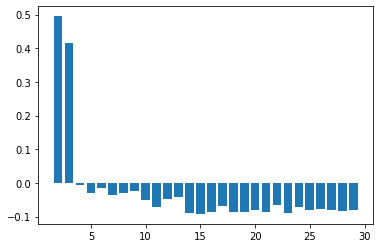

100-50dim
[0.49505405687710735, 0.41658483130347657, -0.007143561656609997, -0.03029700531512278, -0.016291294912469025, -0.036384080646054064, -0.031080511290983274, -0.023673987044252085, -0.04999642246922559, -0.0709828668331933, -0.04807685555488684, -0.04279778011079025, -0.09042848403405859, -0.09213656461872512, -0.08505015784182997, -0.068996087339864, -0.08645535685849683, -0.08567400936242826, -0.07970657651063469, -0.08527348021494509, -0.06593522477580546, -0.08832498429000445, -0.07263138886533356, -0.08182639601706855, -0.07810425283626729, -0.08099288706876903, -0.08341424333711837, -0.0811702213245546]


In [18]:
from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_avgs = []
ks = range(2, 30)

for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(encoded_train)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 30 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(SAVE_NAME)
print(silhouette_avgs)

In [19]:
write_json(silhouette_avgs, './score/' + SAVE_NAME + '.json')

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
cos = cosine_similarity(encoded_train)
print(cos.shape)

(166, 166)


In [22]:
cos

array([[0.99999994, 0.93290055, 0.9220271 , ..., 0.958864  , 0.95061046,
        0.7962244 ],
       [0.93290055, 1.0000001 , 0.91390306, ..., 0.90617126, 0.9206845 ,
        0.8505471 ],
       [0.9220271 , 0.91390306, 0.9999999 , ..., 0.94408214, 0.9677053 ,
        0.9042218 ],
       ...,
       [0.958864  , 0.90617126, 0.94408214, ..., 1.        , 0.96850705,
        0.78543323],
       [0.95061046, 0.9206845 , 0.9677053 , ..., 0.96850705, 1.        ,
        0.85217965],
       [0.7962244 , 0.8505471 , 0.9042218 , ..., 0.78543323, 0.85217965,
        1.0000002 ]], dtype=float32)

In [23]:
cos_df = pd.DataFrame(cos, index = df['movie'], columns = df['movie'])
cos_df

movie,21bridgesmovie,47metersdown,abeautifuldaymovie,abominablemovie,adastramovie,adogsjourneymovie,aftermathmovie,aftermovie,ahiddenlifefilm,alitamovie,...,underthesilverlake,usmovie,wavesmovie,whatmenwant,wonderparkmovie,wrinklestheclown,xmenmovies,yardiefilm,yesterdaymovie,zombieland
movie,,,,,,,,,,,,,,,,,,,,,
21bridgesmovie,1.000000,0.932901,0.922027,0.861765,0.951714,0.795996,0.957265,0.954360,0.969175,0.890812,...,0.927713,0.951730,0.956052,0.903496,0.941673,0.969175,0.948219,0.958864,0.950610,0.796224
47metersdown,0.932901,1.000000,0.913903,0.906454,0.914163,0.766626,0.934557,0.938334,0.930641,0.897663,...,0.937889,0.919711,0.959804,0.862566,0.888315,0.930641,0.953413,0.906171,0.920685,0.850547
abeautifuldaymovie,0.922027,0.913903,1.000000,0.825497,0.951290,0.801201,0.952678,0.959849,0.969548,0.949593,...,0.954918,0.946942,0.907500,0.847487,0.888869,0.969548,0.925494,0.944082,0.967705,0.904222
abominablemovie,0.861765,0.906454,0.825497,1.000000,0.841461,0.686070,0.846729,0.888612,0.847388,0.835088,...,0.871246,0.845763,0.890531,0.808419,0.848813,0.847388,0.918194,0.779146,0.853579,0.810323
adastramovie,0.951714,0.914163,0.951290,0.841461,1.000000,0.763903,0.972663,0.973847,0.985826,0.937892,...,0.949432,0.955477,0.925119,0.843443,0.884066,0.985826,0.932032,0.961543,0.969844,0.813225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrinklestheclown,0.969175,0.930641,0.969548,0.847388,0.985826,0.805646,0.988913,0.983282,1.000000,0.932386,...,0.964577,0.972027,0.945232,0.873691,0.915602,1.000000,0.936529,0.984830,0.984348,0.836272
xmenmovies,0.948219,0.953413,0.925494,0.918194,0.932032,0.818365,0.933926,0.959086,0.936529,0.929981,...,0.947302,0.931141,0.955270,0.895126,0.921194,0.936529,1.000000,0.894847,0.935871,0.884054
yardiefilm,0.958864,0.906171,0.944082,0.779146,0.961543,0.790530,0.970527,0.953872,0.984830,0.894759,...,0.932928,0.962582,0.924576,0.874110,0.901244,0.984830,0.894847,1.000000,0.968507,0.785433


In [24]:
cos_df.to_csv('./cosine_similarity/' + SAVE_NAME + '_cos.csv')

In [27]:
ls = os.listdir('./score/')
ls.sort()

In [29]:
del ls[0]
ls

['100-20dim.json',
 '100-50dim.json',
 '200-100dim.json',
 '200-20dim.json',
 '200-50dim.json']

In [31]:
rows = []
for file in ls:
    name = file.split('.')[0]
    score = read_json('./score/' + file)
    rows.append([name] + score)

In [37]:
score_df = pd.DataFrame(rows, columns = range(1, 30))
score_df

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,100-20dim,0.709593,0.416585,0.134493,0.006789,-0.002948,-0.010283,-0.045716,-0.025085,-0.016461,...,-0.052729,-0.110247,-0.109914,-0.100601,-0.093206,-0.094645,-0.092785,-0.110516,-0.095665,-0.100136
1,100-50dim,0.495054,0.416585,-0.007144,-0.030297,-0.016291,-0.036384,-0.031081,-0.023674,-0.049996,...,-0.079707,-0.085273,-0.065935,-0.088325,-0.072631,-0.081826,-0.078104,-0.080993,-0.083414,-0.081170
2,200-100dim,0.018655,-0.020734,-0.068974,-0.073362,-0.088553,-0.083755,-0.096181,-0.086022,-0.087063,...,-0.149070,-0.117949,-0.174657,-0.177120,-0.147020,-0.158877,-0.109371,-0.164174,-0.153244,-0.129737
3,200-20dim,0.017115,-0.022608,-0.058158,-0.081336,-0.048571,-0.068439,-0.089588,-0.064549,-0.072382,...,-0.128352,-0.129482,-0.147803,-0.114450,-0.168514,-0.104297,-0.172290,-0.102614,-0.112909,-0.102186
4,200-50dim,0.014916,-0.010458,-0.052574,-0.057372,-0.060893,-0.088251,-0.075009,-0.076730,-0.088849,...,-0.105824,-0.098384,-0.065183,-0.062000,-0.119290,-0.111256,-0.133361,-0.090539,-0.114002,-0.191325


In [38]:
score_df.to_csv('./output/score_df.csv', index = 0)